# PD 5
### Klaudia Gruszkowska

In [1]:
import pandas as pd
df = pd.read_csv('clustering.csv',names = ['x','y'])
df.head()

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


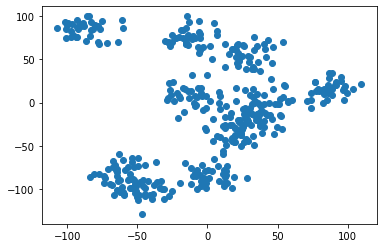

In [40]:
import matplotlib.pyplot as plt
plt.scatter(df['x'],df['y'])
plt.show()

Po obejrzeniu zwykłego scatterplota z nałożonymi punktami z ramki danych, możemy zauważyć grupowanie się ich w klastry. Na pierwszy rzut oka wydaje się jakby ich odpowiednią ilością było 8. Poniżej sprawdzę jak ile wskazują poszczególne metody.

In [9]:
import warnings
warnings.filterwarnings('ignore')

## Metoda K-Means

In [27]:
scores = []
for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(df)
        score = kmeans.score(df) * -1 
        scores.append(score)

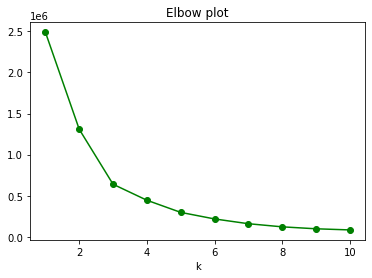

In [64]:
x_ticks = list(range(1, len(scores)+2))
plt.plot(x_ticks, wcss_vec, 'go-')
plt.xlabel('k')
plt.title('Elbow plot')
plt.show()

W tym przypadku ciężko rozstrzygnąć, w którym miejscu jest największe przegięcie. Wydaje sie jakby w punkcie k=3 ale linia nie jest mocno "zgięta".

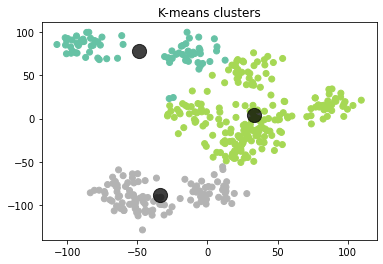

In [79]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)
plt.scatter(df['x'], df['y'], c=y_kmeans,cmap = 'Set2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
plt.title('K-means clusters')
plt.show()

Tak prezentuje się scatterplot z zaznaczonym podziałem na 3 klastry.  Jednak taki posział klastrów nie wydaje się być poprawny, dlatego spróbuję metody silhouette aby wyznaczyć poprawną liczbę klastrów.

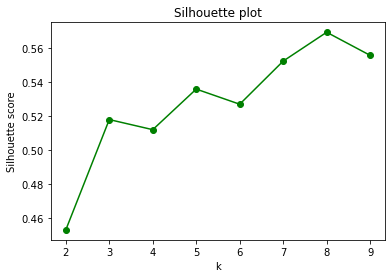

In [84]:
from sklearn.metrics import silhouette_score
cluster_num_seq = range(2, 10)  
scores = []
for k in cluster_num_seq:
    labels = KMeans(n_clusters=k, random_state=0).fit_predict(df)
    score = silhouette_score(df, labels)
    scores.append(score)

plt.plot(cluster_num_seq, scores, 'go-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette plot')
plt.show()

Metoda silhouette w tym przypadku wskazuje na k=8 co zgadzałoby się z hipotezą z początku. 

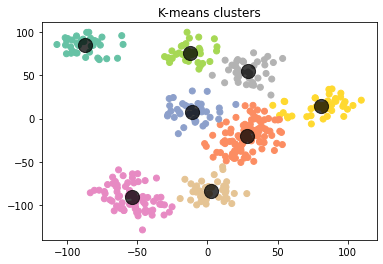

In [80]:
kmeans2 = KMeans(n_clusters=8, random_state=0)
kmeans2.fit(df)
y_kmeans2 = kmeans2.predict(df)
plt.scatter(df['x'], df['y'], c=y_kmeans2 ,cmap = 'Set2')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.75)
plt.title('K-means clusters')
plt.show()

W tym przypadku pola są mniejsze ale bardziej zarysowane. Taki podział wydaje się być lepszy.

## Metoda aglomeracyjna

Kolejną metodą jest klastering aglomeracyjny. Najpierw narysuje wykres dendrogram.

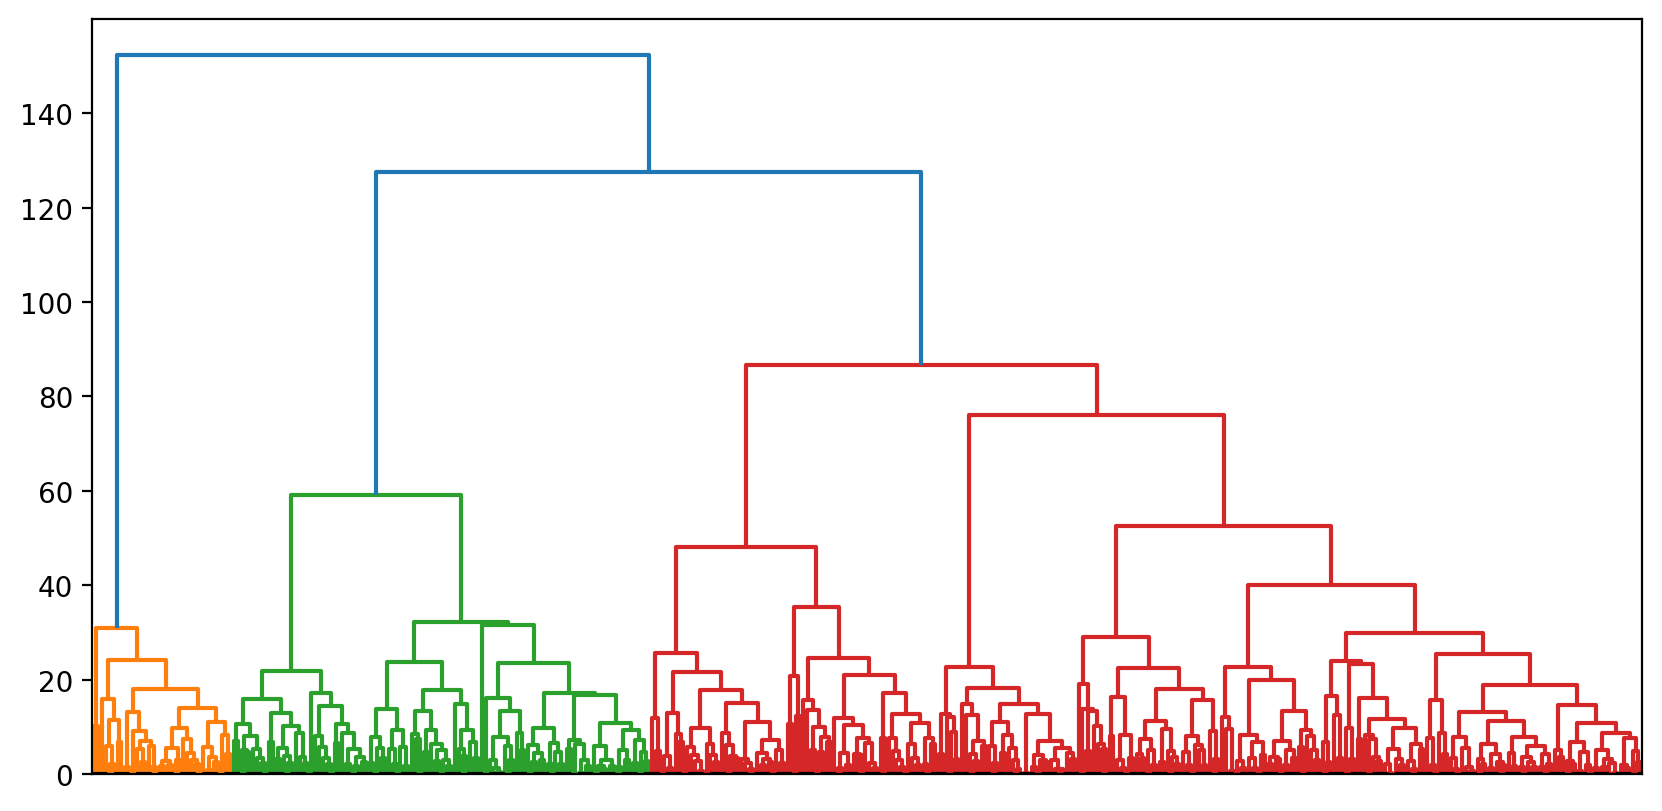

In [61]:
from scipy.cluster import hierarchy


Z = hierarchy.linkage(df, method='average')
plt.figure(figsize=(10, 5), dpi= 200)
hierarchy.dendrogram(Z,no_labels=True)
plt.axhline(c = 'black',linestyle='--') 
plt.show()

Wydaje mi się, że w tym przypadku wysokość lini zmniejsza się pomiędzy 40 a 60. Pionowe linie wyznaczają klastry. Jak policzymy ilość podzielonych w tym miejscu klastrów to otrzymamy 6.

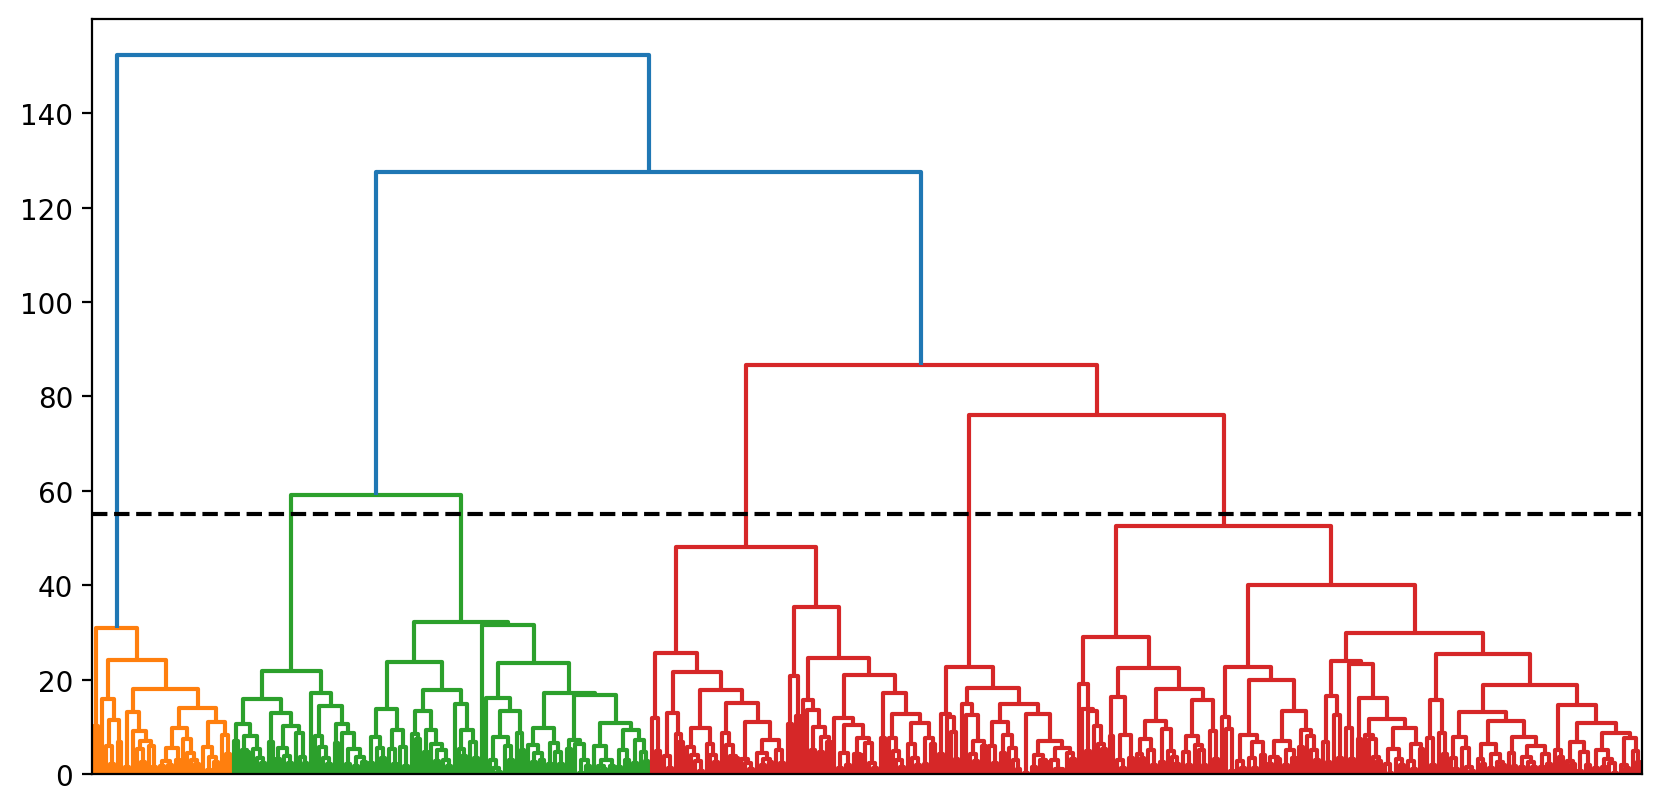

In [60]:
Z = hierarchy.linkage(df, method='average')
plt.figure(figsize=(10, 5), dpi= 200)
hierarchy.dendrogram(Z,no_labels=True)
plt.axhline(c = 'black',linestyle='--',y =55) 
plt.show()

In [86]:
from sklearn.cluster import AgglomerativeClustering

def agglomerative (linkage):
    model = AgglomerativeClustering(n_clusters=6,linkage = linkage)
    y = model.fit_predict(df)
    plt.scatter(df['x'], df['y'], c=y,cmap = 'Set2')
    plt.show()

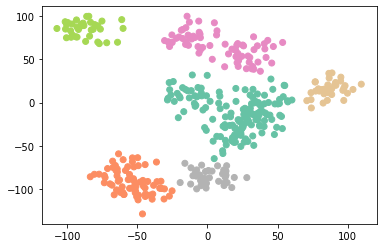

In [88]:
agglomerative('ward')

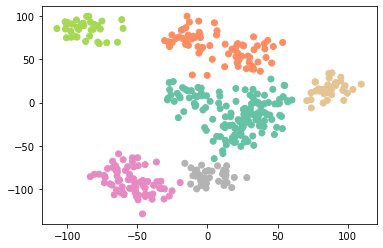

In [87]:
agglomerative('average')

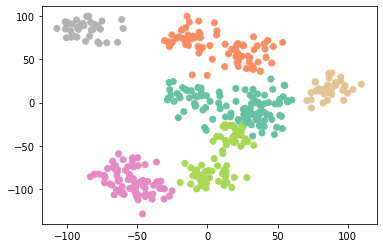

In [89]:
agglomerative('complete')

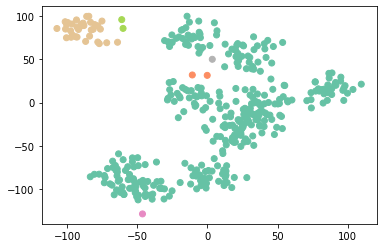

In [90]:
agglomerative('single')

Tak prezentuje się podział na 6 klastrów metodą aglomeracyjną. Obliczanie odległości metodą 'ward', 'average','complete' dają podobne rezultaty, za to 'single' nie dzieli dobrze na klastry. .

### Wnioski
Dobór odpowiedniej liczby klastrów jest w tym przypadku niejasny. W przypadku wykresu łokciowego i dendrogramu ciężko jest mi stwierdzić w którym miejscu powinnismy uznać liczbę klastrów za prawidłową. Różne metody klastrowania dają też lekko różne wyniki. Za równo podział na 8 klastrów metodą k-means jak i 6 klastrów metodą aglomeracyjną wydają się być okej dla tych danych.